# Imports and loading data

In [1]:
import pandas as pd
import numpy as np

#importing data (preformance metrics and optimisations)
metrics_df = pd.read_csv('raw_data.csv', index_col=0, parse_dates=True)
opt_df = pd.read_csv('opt_dates.csv', index_col=0, parse_dates=True)

In [2]:
metrics_df

,"Dummy App,Conversion Rate - Non-organic,US,GP","Dummy App,Conversion Rate - Organic (from Play Store Explore),US,GP","Dummy App,Conversion Rate - Organic (from Play Store Search),US,GP","Dummy App,Conversion Rate - Organic (from Play Store),US,GP","Dummy App,Conversion Rate - Total,US,GP","Dummy App,Daily Active Users - Total,US,GP","Dummy App,First-time Install Ratio - Organic (from Play Store Search),US,GP","Dummy App,First-time Install Ratio - Total,US,GP","Dummy App,First-time Installs - Non-organic,US,GP","Dummy App,First-time Installs - Organic (from Play Store Explore),US,GP",...,"Dummy App,Total Installs - Organic,US,iOS","Dummy App,Total Installs - Total,US,iOS","Dummy App,Unique Impressions - Non-organic (from App Referrer),US,iOS","Dummy App,Unique Impressions - Non-organic (from Unknown),US,iOS","Dummy App,Unique Impressions - Non-organic (from Web Referrer),US,iOS","Dummy App,Unique Impressions - Non-organic,US,iOS","Dummy App,Unique Impressions - Organic (from App Store Browse),US,iOS","Dummy App,Unique Impressions - Organic (from App Store Search),US,iOS","Dummy App,Unique Impressions - Organic,US,iOS","Dummy App,Unique Impressions - Total,US,iOS"
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,724.000000,964.000000,1781.0,0.0,879.0,NaN,12550.0,20508.0,33058.0,35718.0
2017-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,833.000000,1071.000000,1662.0,0.0,890.0,NaN,12241.0,21366.0,33607.0,36159.0
2017-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,547.000000,718.000000,1081.0,0.0,664.0,NaN,10568.0,16100.0,26668.0,28413.0
2017-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,494.000000,1191.000000,1081.0,0.0,1201.0,NaN,13478.0,18388.0,31866.0,34148.0
2017-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,538.000000,967.000000,1631.0,0.0,1552.0,NaN,17097.0,22380.0,39477.0,42660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.151575,0.126506,0.418699,0.344985,0.260720,NaN,0.575419,0.628099,77.0,21.0,...,3131.333333,4266.333333,2565.0,0.0,828.0,NaN,5134.0,11187.0,16321.0,19714.0
2022-11-05,0.232836,0.174312,0.560780,0.483486,0.388068,NaN,0.558219,0.606034,156.0,38.0,...,4279.500000,5389.750000,1335.0,0.0,839.0,NaN,6671.0,14897.0,21568.0,23742.0
2022-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8886.878788,12362.121212,7433.0,0.0,1653.0,NaN,7221.0,21294.0,28515.0,37601.0


It appears we have some missing values. This will be addressed later.

In [3]:
list(metrics_df.columns)

['Dummy App,Conversion Rate - Non-organic,US,GP',
 'Dummy App,Conversion Rate - Organic (from Play Store Explore),US,GP',
 'Dummy App,Conversion Rate - Organic (from Play Store Search),US,GP',
 'Dummy App,Conversion Rate - Organic (from Play Store),US,GP',
 'Dummy App,Conversion Rate - Total,US,GP',
 'Dummy App,Daily Active Users - Total,US,GP',
 'Dummy App,First-time Install Ratio - Organic (from Play Store Search),US,GP',
 'Dummy App,First-time Install Ratio - Total,US,GP',
 'Dummy App,First-time Installs - Non-organic,US,GP',
 'Dummy App,First-time Installs - Organic (from Play Store Explore),US,GP',
 'Dummy App,First-time Installs - Organic (from Play Store Search),US,GP',
 'Dummy App,First-time Installs - Organic (from Play Store),US,GP',
 'Dummy App,First-time Installs - Total,US,GP',
 'Dummy App,Installs - Total,US,GP',
 'Dummy App,Monthly Active Users - Total,US,GP',
 'Dummy App,Reinstalls - Non-organic,US,GP',
 'Dummy App,Reinstalls - Organic (from Play Store Explore),US,GP',


In [4]:
opt_df

,Type,Platform
Date,,
2020-02-03,Metadata optimisation,iOS
2020-03-09,LiveExp - Creative (iOS),iOS
2021-08-03,Creative optimisation,iOS
2021-08-17,Metadata optimisation,iOS
2021-08-31,Creative optimisation,iOS
2021-09-21,Creative optimisation,iOS
2021-09-27,Metadata optimisation,iOS
2022-05-26,Metadata optimisation,iOS
2022-07-18,Metadata optimisation,iOS


# Basic cleanup

In [5]:
#selecting only the relevant metrics - organic search coversion rates (excluding reinstalls)

metrics_df = metrics_df.loc[:, metrics_df.columns.str.contains(',Conversion Rate - Organic.+Search')]
metrics_df

,"Dummy App,Conversion Rate - Organic (from Play Store Search),US,GP","Dummy App,Conversion Rate - Organic (from App Store Search),US,iOS"
Date,,
2017-04-15,NaN,0.027648
2017-04-16,NaN,0.029954
2017-04-17,NaN,0.025217
2017-04-18,NaN,0.021645
2017-04-19,NaN,0.018856
...,...,...
2022-11-04,0.418699,0.033879
2022-11-05,0.560780,0.038128
2022-11-06,NaN,0.063680


In [6]:
#as the task is to only analyse changes in creatives, we get rid of metadata optimisation rows
opt_df = opt_df[opt_df.loc[:, 'Type'].str.contains('Creative')]

#we also remove duplicates
opt_df = opt_df.reset_index().drop_duplicates().set_index('Date')
opt_df

,Type,Platform
Date,,
2020-03-09,LiveExp - Creative (iOS),iOS
2021-08-03,Creative optimisation,iOS
2021-08-31,Creative optimisation,iOS
2021-09-21,Creative optimisation,iOS
2022-09-13,Creative optimisation,iOS
2020-03-04,GoogleExp - Creative,GP
2021-07-31,Creative optimisation,GP
2021-08-27,GoogleExp - Creative,GP
2021-08-31,GoogleExp - Creative,GP


In [7]:
#renaming columns to be more concise

metrics_df.columns = [ 'Play Store Search', 'App Store Search']
metrics_df

,Play Store Search,App Store Search
Date,,
2017-04-15,NaN,0.027648
2017-04-16,NaN,0.029954
2017-04-17,NaN,0.025217
2017-04-18,NaN,0.021645
2017-04-19,NaN,0.018856
...,...,...
2022-11-04,0.418699,0.033879
2022-11-05,0.560780,0.038128
2022-11-06,NaN,0.063680


#  Plots 

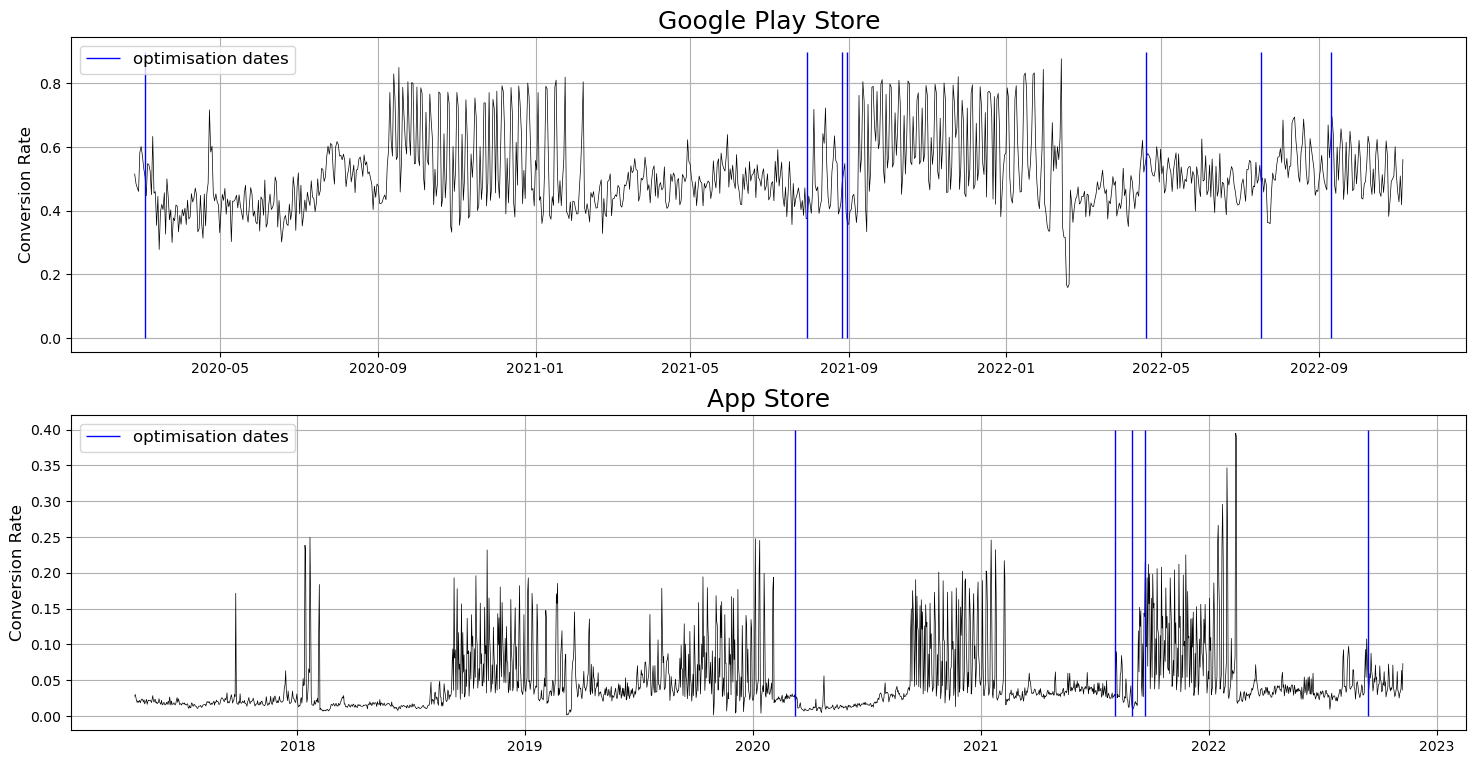

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(18, 9))

ax[0].plot(metrics_df.iloc[:, 0], linewidth=0.5, color='black')
ax[1].plot(metrics_df.iloc[:, 1], linewidth=0.5, color='black')

ax[0].grid(True)
ax[1].grid(True)

ax[0].set_title('Google Play Store', fontsize=18)
ax[1].set_title('App Store', fontsize=18)

ax[0].set_ylabel('Conversion Rate', fontsize=12)
ax[1].set_ylabel('Conversion Rate', fontsize=12)


ax[0].vlines(opt_df.loc[opt_df['Platform'] == 'GP'].index, 
             label='optimisation dates', color='blue', 
             ymin = 0, ymax = 0.9, linewidth=1)
ax[1].vlines(opt_df.loc[opt_df['Platform'] == 'iOS'].index, 
             label='optimisation dates', color='blue', 
             ymin = 0, ymax = 0.4, linewidth=1)

ax[0].legend(loc='upper left', fontsize=12)
ax[1].legend(loc='upper left', fontsize=12)

The noticeable gap in conversion rate between stores exists due to them using different ways to measure it.

Also, we might not have enough data prior to the first GP optimisation (2020-03-04) to produce a full report. Let's look closer:

In [9]:
metrics_df[pd.Timestamp('2020-03-04') - pd.DateOffset(days=14): '2020-03-04']

,Play Store Search,App Store Search
Date,,
2020-02-19,NaN,0.023143
2020-02-20,NaN,0.018350
2020-02-21,NaN,0.023267
2020-02-22,NaN,0.027414
2020-02-23,NaN,0.023523
2020-02-24,NaN,0.030944
2020-02-25,0.515337,0.023924
2020-02-26,0.485294,0.028720
2020-02-27,0.472050,0.026651


We only have 8 days worth of data prior to the optimisation. This is important to note when looking at the results.

# Aggregation

In [10]:
def produce_report(date, opt_platform):
  pre_opt = metrics_df.loc[date - pd.DateOffset(days=14) : date - pd.DateOffset(days=1)]
  post_opt = metrics_df.loc[date:date + pd.DateOffset(days=13)]

  if(opt_platform == 'GP'):

    pre_opt = pre_opt.iloc[:, 0].to_frame()
    post_opt = post_opt.iloc[:, 0].to_frame()

  elif(opt_platform == 'iOS'):

    pre_opt = pre_opt.iloc[:, 1].to_frame()
    post_opt = post_opt.iloc[:, 1].to_frame()

  pre_opt.columns = ['Organic Search Conversion Rate']
  post_opt.columns = ['Organic Search Conversion Rate']

  pre_mean = pre_opt.agg(np.mean)
  pre_median =  pre_opt.agg(np.median)

  post_mean = post_opt.agg(np.mean)
  post_median =  post_opt.agg(np.median)

  delta_mean = post_mean - pre_mean 
  delta_median = post_median - pre_median 


  pre_mean.index += ' Pre Mean'
  pre_median.index += ' Pre Median'

  post_mean.index += ' Post Mean'
  post_median.index += ' Post Median'

  delta_mean.index += ' Mean Delta'
  delta_median.index += ' Median Delta'

  report = pd.concat([pre_mean, post_mean, delta_mean, pre_median, post_median, delta_median])
  return report.to_frame().T 

In [11]:
res = pd.DataFrame()
for date, platform in zip(opt_df.index, opt_df.loc[:, 'Platform']):
  res = pd.concat([res, produce_report(date, platform)], ignore_index=True)
res.set_index(opt_df.index, inplace=True)

# Producing the final report

In [12]:
report = pd.concat([opt_df, res], axis=1)
report

,Type,Platform,Organic Search Conversion Rate Pre Mean,Organic Search Conversion Rate Post Mean,Organic Search Conversion Rate Mean Delta,Organic Search Conversion Rate Pre Median,Organic Search Conversion Rate Post Median,Organic Search Conversion Rate Median Delta
Date,,,,,,,,
2020-03-09,LiveExp - Creative (iOS),iOS,0.027598,0.014969,-0.012628,0.027628,0.011878,-0.015749
2021-08-03,Creative optimisation,iOS,0.028955,0.047139,0.018184,0.027326,0.030487,0.003161
2021-08-31,Creative optimisation,iOS,0.026370,0.045644,0.019274,0.022858,0.017497,-0.005361
2021-09-21,Creative optimisation,iOS,0.083307,0.137473,0.054165,0.081114,0.153761,0.072647
2022-09-13,Creative optimisation,iOS,0.049233,0.053762,0.004529,0.037451,0.052736,0.015285
2020-03-04,GoogleExp - Creative,GP,0.528038,0.461609,-0.066429,0.524243,0.452414,-0.071829
2021-07-31,Creative optimisation,GP,0.439684,0.481027,0.041343,0.441622,0.454227,0.012605
2021-08-27,GoogleExp - Creative,GP,0.513615,0.451336,-0.062279,0.532997,0.411827,-0.121170
2021-08-31,GoogleExp - Creative,GP,0.487352,0.500331,0.012979,0.505799,0.428620,-0.077180


As I have mentioned above, the results for the GP optimisation on 2020-03-04 might not be as reliable as the rest: the pre-optimisation mean and meadian were calculated based on only 8 days worth of data.